# Site 734 Late Not Sorted v. Mid
This notebook calculates and plots the enrichment of codons at site 734 in the late not sorted gDNA samples compared to mid gDNA samples.

**Sample Info**

In [1]:
# selection_sample info
stage = "late"
sort_status = "notSorted"

# reference_sample info
ref_stage = 'mid'
ref_sort_status = "notSorted"

## Notebook setup
Imports

In [2]:
import pandas as pd
import plotnine as p9

# print imports and versions
# copied from https://stackoverflow.com/questions/40428931/package-for-listing-version-of-packages-used-in-a-jupyter-notebook
print('\n'.join(f'{m.__name__}=={m.__version__}' \
                for m in globals().values() if getattr(m, '__version__', None)))

%run ../../functions/enrichment.py.ipynb import calculate_enrichment

pandas==0.25.3
plotnine==0.6.0


Input data

In [3]:
site_734_counts = '../../results/site_734/site_734_counts.csv'
permitted_codons_file = '../../results/site_734/permitted_codons.csv'
stat2_luciferase_file = '../../data/STAT2_luciferase_results.csv'

Output data

In [4]:
site_734_dir = '../../results/site_734/'

Notebook aesthetics

In [5]:
p9.theme_set(p9.theme_classic())
CBPALETTE_RICH = ['#648FFF', '#FFB000', '#DC267F', '#785EF0', '#FE6100']

## Load data
Load site 734 frequencies

In [6]:
codon_counts = pd.read_csv(site_734_counts)
display(codon_counts)

,codon,count,library,name,site,sorted,source,stage,wildtype,mutant_codon,letter
0,AAC,0.000000,wt,wt-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,True,N
1,AAC,33.000000,wt,wt-gDNA-noStage-notSorted,734,notSorted,gDNA,noStage,GAT,True,N
2,AAC,129.000000,lib1,lib1-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,True,N
3,AAC,54.000000,lib2,lib2-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,True,N
4,AAC,83.000000,lib3,lib3-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,True,N
...,...,...,...,...,...,...,...,...,...,...,...
457,TAC,74.000000,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,True,Y
458,TGA,85.333333,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,True,O
459,TGC,67.666667,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,True,C
460,TGG,83.000000,mean,mean-plasmid-noStage-notSorted,734,notSorted,plasmid,noStage,GAT,True,W


In [7]:
codon_counts['name'].unique()

array(['wt-plasmid-noStage-notSorted', 'wt-gDNA-noStage-notSorted',
       'lib1-plasmid-noStage-notSorted', 'lib2-plasmid-noStage-notSorted',
       'lib3-plasmid-noStage-notSorted', 'lib1-gDNA-early-notSorted',
       'lib2-gDNA-early-notSorted', 'lib3-gDNA-early-notSorted',
       'lib1-gDNA-mid-notSorted', 'lib2-gDNA-mid-notSorted',
       'lib3-gDNA-mid-notSorted', 'lib1-gDNA-late-notSorted',
       'lib2-gDNA-late-notSorted', 'lib3-gDNA-late-notSorted',
       'lib1-gDNA-late-sorted', 'lib2-gDNA-late-sorted',
       'lib3-gDNA-late-sorted', 'mean-gDNA-early-notSorted',
       'mean-gDNA-late-notSorted', 'mean-gDNA-late-sorted',
       'mean-gDNA-mid-notSorted', 'mean-plasmid-noStage-notSorted'],
      dtype=object)

## Plot enrichment for each library:

In [8]:
libs = ['lib1', 'lib2', 'lib3']

Calculating enrichment between:
lib1-gDNA-late-notSorted and lib1-gDNA-mid-notSorted


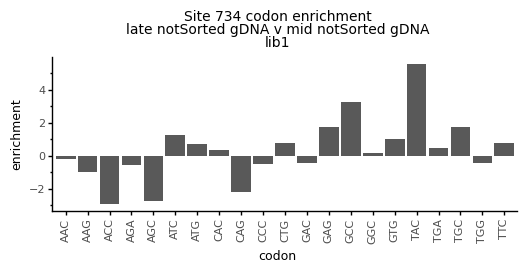

<ggplot: (8727918340961)>

Calculating enrichment between:
lib2-gDNA-late-notSorted and lib2-gDNA-mid-notSorted


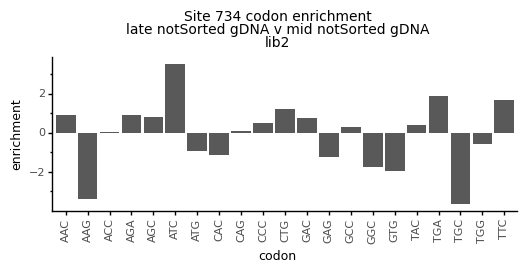

<ggplot: (8727909437853)>

Calculating enrichment between:
lib3-gDNA-late-notSorted and lib3-gDNA-mid-notSorted


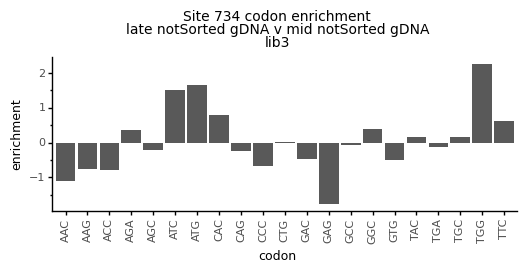

<ggplot: (8727909446677)>

In [9]:
for lib in libs:
    selected_sample = f'{lib}-gDNA-{stage}-{sort_status}'
    reference_sample = f'{lib}-gDNA-{ref_stage}-{ref_sort_status}'
    print('Calculating enrichment between:')
    print(f'{selected_sample} and {reference_sample}')
    enrichment_df = calculate_enrichment(
        codon_counts,
        selected_sample,
        reference_sample)
    enrichment_plot = (p9.ggplot(enrichment_df) +
                    p9.aes(x='codon',
                           y='enrichment') +
                    p9.geom_bar(stat='identity') +
                    p9.ggtitle('Site 734 codon enrichment\n'
                               f'{stage} {sort_status} gDNA v {ref_stage} {ref_sort_status} gDNA\n'
                               f'{lib}') +
                    p9.labs(x='codon',
                            y='enrichment') +
                    p9.theme(figure_size=(6, 2),
                             plot_title=p9.element_text(size=10),
                             axis_title=p9.element_text(size=9),
                             axis_text_x=p9.element_text(size=8, rotation=90),
                             axis_text_y=p9.element_text(size=8))
                   )

    display(enrichment_plot)

## Comparison to STAT2 antagonism luciferase assay
Each of these amino acids has previously been tested for ability to antagonize STAT2 in a luciferase assay. How do the sequencing-based enrichment scores correlate with the luciferase assay results?

In [10]:
stat2_results = pd.read_csv(stat2_luciferase_file)
display(stat2_results.sort_values(by='FLUC_RLUC'))

,amino_acid,FLUC_RLUC
20,D,1.6
19,E,6.4
18,S,48.9
17,C,54.3
16,N,77.9
15,T,88.8
14,W,90.7
13,Q,95.2
12,H,96.8
11,A,105.8


Calculate enrichment for mean counts:

In [11]:
lib = "mean"

selected_sample = f'{lib}-gDNA-{stage}-{sort_status}'
reference_sample = f'{lib}-gDNA-{ref_stage}-{ref_sort_status}'
print('Calculating enrichment between:')
print(f'{selected_sample} and {reference_sample}')
enrichment_df = calculate_enrichment(
    codon_counts,
    selected_sample,
    reference_sample)
display(enrichment_df)

Calculating enrichment between:
mean-gDNA-late-notSorted and mean-gDNA-mid-notSorted


,codon,letter,count_selected,count_pseudo_selected,count_reference,count_pseudo_reference,enrichment
0,AAC,N,53.666667,53.766667,56.000000,56.100000,-0.082939
1,AAG,K,42.666667,42.766667,132.666667,132.766667,-1.655985
2,ACC,T,68.333333,68.433333,143.333333,143.433333,-1.089260
3,AGA,R,94.000000,94.100000,89.666667,89.766667,0.046364
4,AGC,S,84.333333,84.433333,89.000000,89.100000,-0.099263
5,ATC,I,138.666667,138.766667,37.333333,37.433333,1.868615
6,ATG,M,131.333333,131.433333,106.333333,106.433333,0.282731
7,CAC,H,105.333333,105.433333,109.333333,109.433333,-0.075372
8,CAG,Q,122.000000,122.100000,197.000000,197.100000,-0.712515
9,CCC,P,68.333333,68.433333,81.666667,81.766667,-0.278464


Plot correlation to luciferase assay:

,enrichment,amino_acid,FLUC_RLUC
11,-0.173544,D,1.6
12,-0.926240,E,6.4
4,-0.099263,S,48.9
18,-0.202404,C,54.3
0,-0.082939,N,77.9
2,-1.089260,T,88.8
19,0.039865,W,90.7
8,-0.712515,Q,95.2
7,-0.075372,H,96.8
13,1.215114,A,105.8


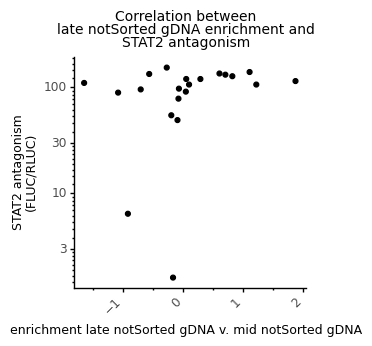

<ggplot: (8728776528945)>

In [12]:
enrichment_stat2_corr = (pd.merge(
    left=enrichment_df[['letter','enrichment']],
    right=stat2_results,
    left_on='letter',
    right_on='amino_acid',
    how='outer')
    .drop(columns='letter'))
display(enrichment_stat2_corr.sort_values(by='FLUC_RLUC'))

enrichment_stat2_corr_plot = (
    p9.ggplot(enrichment_stat2_corr) +
    p9.aes(x='enrichment',
           y='FLUC_RLUC') +
    p9.geom_point() +
    p9.ggtitle(f'Correlation between\n{stage} {sort_status} gDNA enrichment and\nSTAT2 antagonism') +
    p9.labs(x=f'enrichment {stage} {sort_status} gDNA v. {ref_stage} {ref_sort_status} gDNA',
            y='STAT2 antagonism\n(FLUC/RLUC)') +
    p9.scale_y_log10() +
    p9.theme(figure_size=(3,3),
             plot_title=p9.element_text(size=10),
             axis_title=p9.element_text(size=9),
             axis_text_x=p9.element_text(rotation=45, hjust=1),
             legend_position='right',
             legend_title=p9.element_text(size=10),
             legend_title_align='center'))

display(enrichment_stat2_corr_plot)